In [2]:
%pip install spacy
%pip install langid

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vinod ghanchi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 1.9/1.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for langid, since package 'wheel' is not installed.
  Running setup.py install for langid: started
  Running setup.py install for langid: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vinod ghanchi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# import libraries we'll use
import spacy # fast NLP
import pandas as pd # dataframes
import langid # language identification (i.e. what language is this?)
from nltk.classify.textcat import TextCat # language identification from NLTK
from matplotlib.pyplot import plot # not as good as ggplot in R :p

In [12]:
# read in our data
tweetsData = pd.read_csv('NMtweets.csv',encoding='cp1252')

# check out some of our tweets
tweetsData['Tweet'][0:5]

0    With Party colleagues at the National Executiv...
1    Landed in the dynamic city of Hyderabad to tak...
2    ??????? ???? ????????? ?? ?????????? @BJP4Indi...
3    We mark #5YearsofGST, a major tax reform that ...
4    Thank you His Excellency @naftalibennett for b...
Name: Tweet, dtype: object

In [14]:
# create a Spacy document of our tweets
# load an English-language Spacy model
nlp = spacy.load("en_core_web_sm")

# apply the english language model to our tweets
doc = nlp(' '.join(tweetsData['Tweet']))

In [15]:
sorted(doc, key=len, reverse=True)[0:5]

[8YearsOfAspirationalMiddleClass,
 8YearsOfAspirationalMiddleClass,
 G7????????????@kishida230,
 8YearsOfPreservingCulture,
 8YearsOfPreservingCulture]

In [16]:
sorted(doc, key=len, reverse=True)[6:10]

[8YearsOfTechPoweredIndia,
 8YearsOfWomenEmpowerment,
 8YearsOfWomenEmpowerment,
 Regierungskonsultationen]

In [18]:
tweetsData['Tweet'][0:50].apply(langid.classify)

0     (en, -119.55026865005493)
1      (en, -479.4224064350128)
2       (en, 9.061840057373047)
3     (en, -206.16949582099915)
4     (en, -240.69717741012573)
5      (no, -44.27930784225464)
6      (en, -351.8135666847229)
7       (fr, 2.450483798980713)
8     (en, -479.60031962394714)
9       (en, 9.061840057373047)
10    (en, -341.70101737976074)
11     (en, -214.2269411087036)
12     (en, -553.7577757835388)
13     (en, -415.3370852470398)
14     (en, -575.0096960067749)
15     (en, -398.9797534942627)
16     (en, -5.587178707122803)
17     (sv, -16.24671459197998)
18    (en, -450.43737030029297)
19    (en, -482.55674290657043)
20     (en, -640.8854503631592)
21     (en, -232.0299515724182)
22      (en, -362.665265083313)
23    (en, -174.46148109436035)
24      (en, -151.989520072937)
25     (en, -297.7995545864105)
26    (en, -213.99019718170166)
27    (en, -136.66985511779785)
28    (en, -42.246049880981445)
29    (en, -420.67584896087646)
30     (en, -414.8484387397766)
31    (e

In [21]:
import nltk
nltk.download("crubadan")

[nltk_data] Downloading package crubadan to C:\Users\vinod
[nltk_data]     ghanchi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\crubadan.zip.


True

In [22]:
# N-Gram-Based Text Categorization
tc = TextCat()

# try to identify the languages of the first five tweets again
tweetsData['Tweet'][0:50].apply(tc.guess_language)

0     eng
1     eng
2     nds
3     eng
4     eng
5     mlt
6     sun
7     ind
8     sun
9     abk
10    eng
11    eng
12    eng
13    eng
14    eng
15    eng
16    eng
17    eng
18    eng
19    eng
20    eng
21    eng
22    eng
23    eng
24    eng
25    eng
26    eng
27    deu
28    eng
29    eng
30    eng
31    eng
32    eng
33    eng
34    nds
35    eng
36    eng
37    nds
38    eng
39    eng
40    deu
41    deu
42    deu
43    eng
44    eng
45    sun
46    nds
47    eng
48    eng
49    eng
Name: Tweet, dtype: object

In [23]:
# get the language id for each text
ids_langid = tweetsData['Tweet'].apply(langid.classify)

# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
29
Percent of data in English (estimated):
87.71228771228772


<AxesSubplot:>

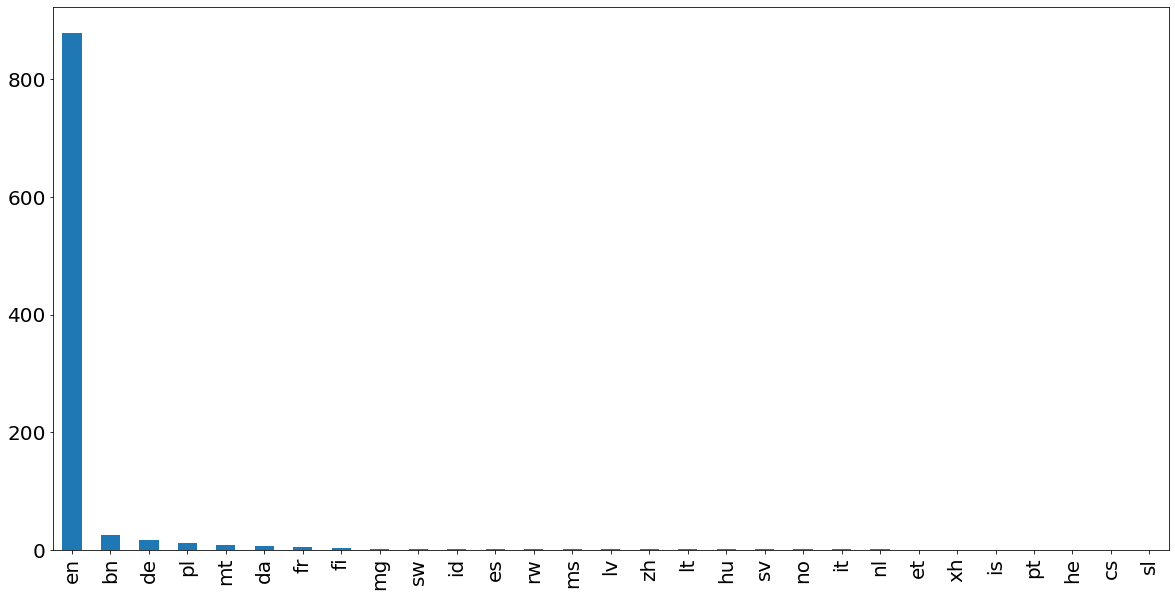

In [24]:
# convert our list of languages to a dataframe
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.Tweet.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [27]:
print("Languages with more than 10 tweets in our dataset:")
print(langs_count[langs_count > 10])

print("")

print("Percent of our dataset in these languages:")
print((sum(langs_count[langs_count > 10])/len(langs)) * 100)

Languages with more than 10 tweets in our dataset:
en    878
bn     27
de     18
pl     12
Name: Tweet, dtype: int64

Percent of our dataset in these languages:
93.4065934065934
